In [328]:
from qiskit import *
import numpy as np

In [329]:
matrix = np.zeros((3, 4))
matrix.fill(-1)
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.]])

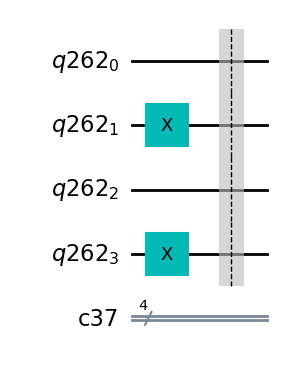

In [330]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

for i in range(1, 4, 2):
    qc.x(qr[i])
qc.barrier()
# update matrix
matrix[2, 1] = 1
matrix[2, 3] = 1
matrix[2, 0] = 0
matrix[2, 2] = 0
qc.draw(output='mpl')

In [331]:
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  1.,  0.,  1.]])

In [332]:
matrix[1][0] = 0
matrix

array([[-1., -1., -1., -1.],
       [ 0., -1., -1., -1.],
       [ 0.,  1.,  0.,  1.]])

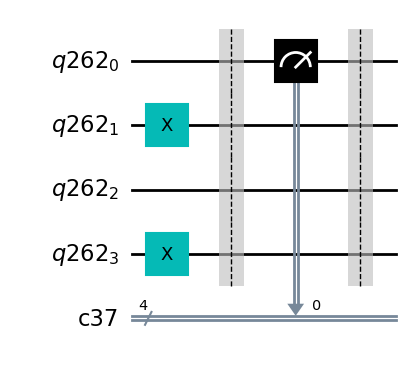

In [333]:
qc.measure(qr[0], cr[0])
qc.barrier()
qc.draw(output='mpl')

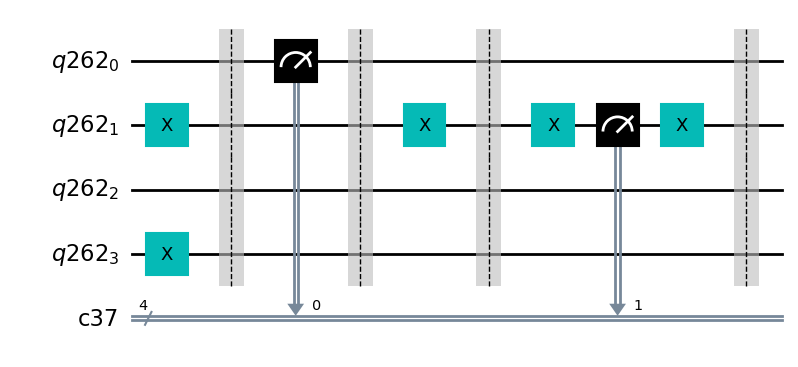

In [334]:
# not gate added by player 1
qc.x(qr[1])
qc.barrier()

# move of player 0
qc.x(qr[1])
qc.measure(qr[1], cr[1])

# remove gate
qc.x(qr[1])

qc.barrier()
qc.draw(output='mpl')

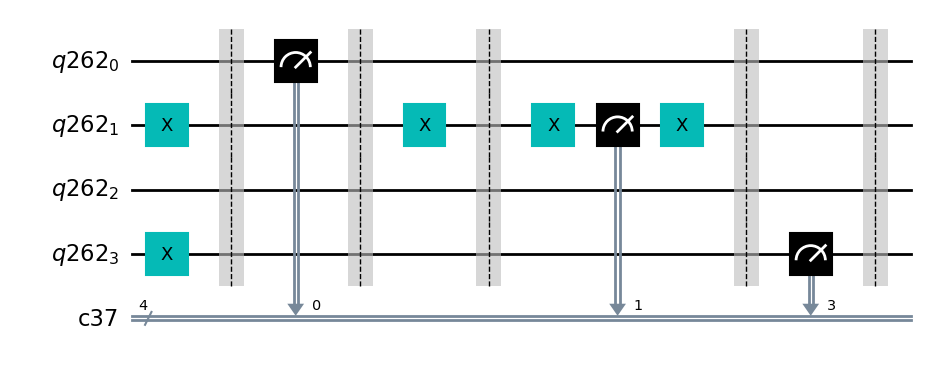

In [335]:
qc.measure(qr[3], cr[3])
qc.barrier()
qc.draw(output='mpl')

{'1010': 1}


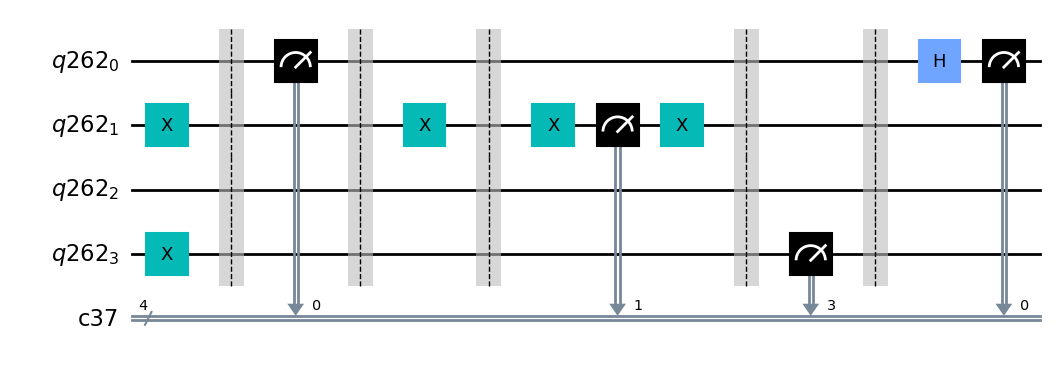

In [336]:
# gate applied by player 0
qc.h(qr[0])

# move of player 1

qc.measure(qr[0], cr[0])
# qc.h(qr[0])
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
result = job.result()
print(result.get_counts(qc))
qc.draw(output='mpl')


{'1010': 1}


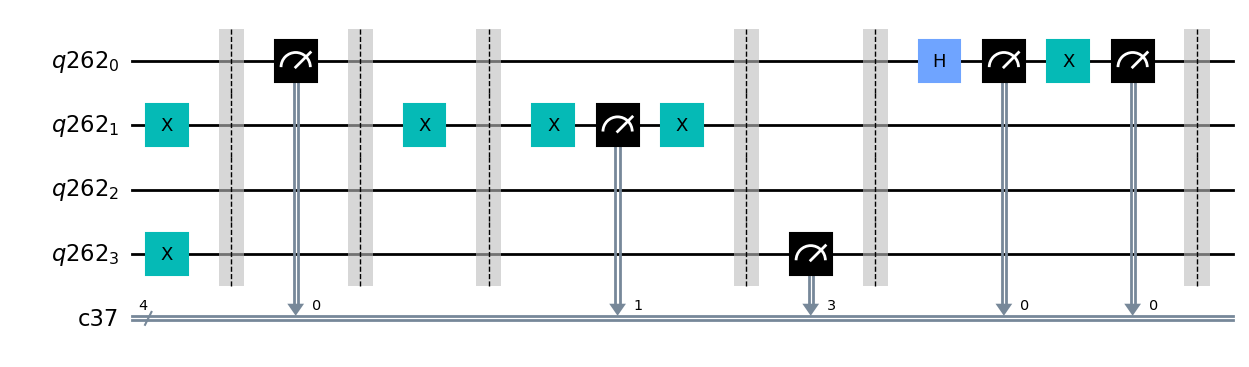

In [337]:
qc.x(qr[0])
qc.measure(qr[0], cr[0])
qc.barrier()


job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
result = job.result()
print(result.get_counts(qc))
qc.draw(output='mpl')



{'0': 1}


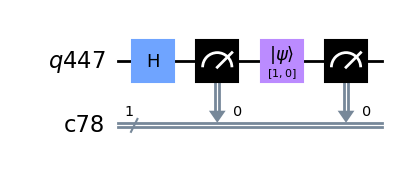

{'0': 100}


In [389]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(qreg[0])
qc.measure(qreg[0], creg[0])

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
result = job.result()
result = result.get_counts(qc)
print(result)

# ----------------------------------

# clear qreg and reinitialize it to |1>
if list(result.keys())[0] == '0':
    qc.initialize([1, 0], 0)
elif list(result.keys())[0] == '1':
    qc.initialize([0, 1], 0)

qc.measure(qreg[0], creg[0])
display(qc.draw(output='mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
result = job.result()
print(result.get_counts(qc))